In [1]:
import numpy as np
import tqdm
from tqdm import tqdm
import torch
import os
import gc
import segmentation_models_pytorch as smp

In [2]:
print(torch.cuda.is_available())
device = "cuda:0"

True


In [3]:
import os
import torch
from torch.utils.data import DataLoader, Dataset
import numpy as np

class CustomDataset(Dataset):
    def __init__(self, data_path, label_path):
        self.data_path = data_path
        self.label_path = label_path
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    def __len__(self):
        return len(os.listdir(self.data_path))

    def __getitem__(self, idx):
        ct = np.load(os.path.join(self.data_path, f"{idx}.npy"))
        mask = np.load(os.path.join(self.label_path, f"{idx}.npy"))

        ct = torch.Tensor(ct).to(self.device)
        mask = torch.Tensor(mask).to(self.device)

        return ct, mask

class DataGenerator:
    def __init__(self, batch_size):
        self.batch_size = batch_size
        self.ROOT_DATA_PATH = 'Task06_Lung/Preprocessed/all/data/'
        self.ROOT_LABEL_PATH = 'Task06_Lung/Preprocessed/all/label/'
        self.TEST_DATA_PATH = 'Task06_Lung/Preprocessed/test/data/'
        self.TEST_LABEL_PATH = 'Task06_Lung/Preprocessed/test/label/'

    def train_loader(self):
        dataset = CustomDataset(self.ROOT_DATA_PATH, self.ROOT_LABEL_PATH)
        return DataLoader(dataset, batch_size=self.batch_size, shuffle=True)

    def test_loader(self):
        dataset = CustomDataset(self.TEST_DATA_PATH, self.TEST_LABEL_PATH)
        return DataLoader(dataset, batch_size=1, shuffle=False)

In [4]:
# Set the batch size
batch_size = 4

# Create an instance of the DataGenerator
data_generator = DataGenerator(batch_size)

# Get the training DataLoader
train_loader = data_generator.train_loader()

# Get the testing DataLoader
test_loader = data_generator.test_loader()

# # Iterate through the training DataLoader
# for batch_idx, (ct, mask) in enumerate(train_loader):
#     # Your training code here
#     print(f"Batch {batch_idx + 1}: CT Shape: {ct.shape}, Mask Shape: {mask.shape}")

# # Iterate through the testing DataLoader
# for batch_idx, (ct, mask) in enumerate(test_loader):
#     # Your testing code here
#     print(f"Batch {batch_idx + 1}: CT Shape: {ct.shape}, Mask Shape: {mask.shape}")


In [5]:
# class DataGenerator:
#     def __init__(self, batch_size):
#         self.batch_size = batch_size
#         self.ROOT_DATA_PATH = 'Task06_Lung/Preprocessed/train/data/'
#         self.ROOT_LABEL_PATH = 'Task06_Lung/Preprocessed/train/label/'
#         self.TEST_DATA_PATH = 'Task06_Lung/Preprocessed/test/data/'
#         self.TEST_LABEL_PATH = 'Task06_Lung/Preprocessed/test/label/'

#     def __len__(self):
#         for _, __, files in os.walk(self.ROOT_DATA_PATH):
#             return len(files)

#     def train_generate(self, size):
#         while True:
#             batch_count = 0
#             yield_list = []
#             for i in range(size):
#                     ct = np.load(self.ROOT_DATA_PATH + str(i) + ".npy")
#                     mask = np.load(self.ROOT_LABEL_PATH + str(i) + ".npy")

#                     ct = torch.Tensor(ct)
#                     mask = torch.Tensor(mask)
#                     ct = ct.to(device)
#                     mask = mask.to(device)
                    
#                     yield_list.append([ct, mask])
#                     batch_count += 1

#                     if batch_count == self.batch_size:
#                         yield yield_list
#                         batch_count = 0
#                         yield_list = []

#     def test_generate(self):
#         for _, __, files in os.walk(self.TEST_DATA_PATH):
#             for file in files:
#                 ct = np.load(self.TEST_DATA_PATH + file)
#                 mask = np.load(self.TEST_LABEL_PATH + file)

#                 ct = torch.Tensor(ct)
#                 mask = torch.Tensor(mask)
#                 ct = ct.to(device)
#                 mask = mask.to(device)
                    
#                 yield [[ct, mask]]         

In [6]:
# %%timeit
# datagen = DataGenerator(batch_size=1)
# iter = datagen.train_generate(datagen.__len__()) 
# data = next(iter)
# print(data[0][0], data[0][1])

In [7]:
# datagen = DataGenerator(batch_size=1)
# iter = datagen.test_generate() 
# data = next(iter)
# print(data[0][0], data[0][1])

In [8]:
# data[0][1]

In [9]:
# # for row in data[0][0]:
# #     print(row)

# data[0][0].shape

In [10]:
# type(data[0][0])

In [11]:
# len(data)

In [12]:
# import torch

# class DoubleConv(torch.nn.Module):
#     """
#     Helper Class which implements the intermediate Convolutions
#     """
#     def __init__(self, in_channels, out_channels):
        
#         super().__init__()
#         self.step = torch.nn.Sequential(torch.nn.Conv2d(in_channels, out_channels, 3, padding=1),
#                                         torch.nn.ReLU(),
#                                         torch.nn.Conv2d(out_channels, out_channels, 3, padding=1),
#                                         torch.nn.ReLU())
        
#     def forward(self, X):
#         return self.step(X)


# class UNet(torch.nn.Module):
#     """
#     This class implements a UNet for the Segmentation
#     We use 3 down- and 3 UpConvolutions and two Convolutions in each step
#     """

#     def __init__(self):
#         """Sets up the U-Net Structure
#         """
#         super().__init__()
        
        
#         ############# DOWN #####################
#         self.layer1 = DoubleConv(1, 64)
#         self.layer2 = DoubleConv(64, 128)
#         self.layer3 = DoubleConv(128, 256)
#         self.layer4 = DoubleConv(256, 512)

#         #########################################

#         ############## UP #######################
#         self.layer5 = DoubleConv(512 + 256, 256)
#         self.layer6 = DoubleConv(256+128, 128)
#         self.layer7 = DoubleConv(128+64, 64)
#         self.layer8 = torch.nn.Conv2d(64, 1, 1)
#         #########################################

#         self.maxpool = torch.nn.MaxPool2d(2)

#     def forward(self, x):
        
#         ####### DownConv 1#########
#         x1 = self.layer1(x)
#         x1m = self.maxpool(x1)
#         ###########################
        
#         ####### DownConv 2#########        
#         x2 = self.layer2(x1m)
#         x2m = self.maxpool(x2)
#         ###########################

#         ####### DownConv 3#########        
#         x3 = self.layer3(x2m)
#         x3m = self.maxpool(x3)
#         ###########################
        
#         ##### Intermediate Layer ## 
#         x4 = self.layer4(x3m)
#         ###########################

#         ####### UpCONV 1#########        
#         x5 = torch.nn.Upsample(scale_factor=2, mode="bilinear")(x4)  # Upsample with a factor of 2
#         x5 = torch.nn.ConvTranspose2d(512, 512, 2, 2)(x4)
#         x5 = torch.cat([x5, x3], dim=1)  # Skip-Connection
#         x5 = self.layer5(x5)
#         ###########################

#         ####### UpCONV 2#########        
#         x6 = torch.nn.Upsample(scale_factor=2, mode="bilinear")(x5)        
#         x6 = torch.nn.ConvTranspose2d(256, 256, 2, 2)(x5)
#         x6 = torch.cat([x6, x2], dim=1)  # Skip-Connection    
#         x6 = self.layer6(x6)
#         ###########################
        
#         ####### UpCONV 3#########        
#         x7 = torch.nn.Upsample(scale_factor=2, mode="bilinear")(x6)
#         x7 = torch.nn.ConvTranspose2d(128, 128, 2, 2)(x6)
#         x7 = torch.cat([x7, x1], dim=1)       
#         x7 = self.layer7(x7)
#         ###########################
        
#         ####### Predicted segmentation#########        
#         ret = self.layer8(x7)
#         return ret

In [13]:
# import torch.nn as nn
# import torch.nn.functional as F

# class IoULoss(nn.Module):
#     def __init__(self, weight=None, size_average=True):
#         super(IoULoss, self).__init__()

#     def forward(self, inputs, targets, smooth=3):
        
#         #comment out if your model contains a sigmoid or equivalent activation layer
#         inputs = F.sigmoid(inputs)       
        
#         #flatten label and prediction tensors
#         inputs = inputs.view(-1)
#         targets = targets.view(-1)
        
#         #intersection is equivalent to True Positive count
#         #union is the mutually inclusive area of all labels & predictions 
#         intersection = (inputs * targets).sum()
#         total = (inputs + targets).sum()
#         union = total - intersection 
        
#         IoU = (intersection + smooth)/(union + smooth)
                
#         return 1 - IoU

In [14]:
# model = UNet()
model =  smp.Unet(
    encoder_name="mobilenet_v2",        # choose encoder, e.g. mobilenet_v2 or efficientnet-b7
    encoder_weights="imagenet",     # use `imagenet` pre-trained weights for encoder initialization
    in_channels=1,                  # model input channels (1 for gray-scale images, 3 for RGB, etc.)
    classes=1,                      # model output channels (number of classes in your dataset)
)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = torch.nn.BCEWithLogitsLoss()
# criterion = IoULoss()

In [15]:
# from fvcore.nn import FlopCountAnalysis
# flops = FlopCountAnalysis(model, train_loader[0])
# flops.total() // 1e-9

In [16]:
# flops.by_operator()

In [17]:
# flops.by_module()

In [18]:
# flops.by_module_and_operator()

In [19]:
torch.device(device=device)

device(type='cuda', index=0)

In [20]:
model = model.to(device)

In [21]:
# size = datagen.__len__()
size = train_loader.__len__()
size

415

In [22]:
EPOCH = 50

In [23]:
for epoch in range(EPOCH):
    model.train()  # Set the model to training mode
    total_loss = 0.0

    for batch_idx, (ct, mask) in enumerate(train_loader):
        # Move data to the appropriate device
        ct, mask = ct.to(device), mask.to(device)

        # Forward pass
        outputs = model(ct)

        # Compute the loss
        loss = criterion(outputs, mask)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # Print average loss for the epoch
    average_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch + 1}/{EPOCH}, Average Loss: {average_loss:.4f}")


Epoch 1/50, Average Loss: 0.0479
Epoch 2/50, Average Loss: 0.0060
Epoch 3/50, Average Loss: 0.0041
Epoch 4/50, Average Loss: 0.0040
Epoch 5/50, Average Loss: 0.0029
Epoch 6/50, Average Loss: 0.0024
Epoch 7/50, Average Loss: 0.0023
Epoch 8/50, Average Loss: 0.0023
Epoch 9/50, Average Loss: 0.0022
Epoch 10/50, Average Loss: 0.0032
Epoch 11/50, Average Loss: 0.0020
Epoch 12/50, Average Loss: 0.0018
Epoch 13/50, Average Loss: 0.0017
Epoch 14/50, Average Loss: 0.0016
Epoch 15/50, Average Loss: 0.0016
Epoch 16/50, Average Loss: 0.0027
Epoch 17/50, Average Loss: 0.0018
Epoch 18/50, Average Loss: 0.0015
Epoch 19/50, Average Loss: 0.0014
Epoch 20/50, Average Loss: 0.0013
Epoch 21/50, Average Loss: 0.0013
Epoch 22/50, Average Loss: 0.0014
Epoch 23/50, Average Loss: 0.0024
Epoch 24/50, Average Loss: 0.0014
Epoch 25/50, Average Loss: 0.0013
Epoch 26/50, Average Loss: 0.0012
Epoch 27/50, Average Loss: 0.0012
Epoch 28/50, Average Loss: 0.0012
Epoch 29/50, Average Loss: 0.0012
Epoch 30/50, Average Lo

In [24]:
# for epoch in range(EPOCH):  # loop over the dataset multiple times

#     running_loss = 0.0
#     for i, (ct, mask) in tqdm(enumerate(train_loader)):
        
#         optimizer.zero_grad()

#         # forward + backward + optimize
#         outputs = model(ct)
#         # labels = labels.cpu().numpy()
#         loss = loss_fn(outputs, mask)
#         loss.backward()
#         optimizer.step()

#         # print statistics
#         running_loss += loss.item()
#         if i % 2000 == 1999:    # print every 2000 mini-batches
#             print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
#             running_loss = 0.0

#         if i == size:
#             break


# print('Finished Training')

In [25]:
class DiceScore(torch.nn.Module):
    """
    class to compute the Dice Loss
    """
    def __init__(self):
        super().__init__()

    def forward(self, pred, mask):

        #flatten label and prediction tensors
        pred = torch.flatten(pred)
        mask = torch.flatten(mask)

        counter = (pred * mask).sum()  # Counter
        print(counter)
        denum = pred.sum() + mask.sum()
        print(denum)  # denominator
        dice = (2*counter)/denum

        return dice


In [26]:
# preds = []
# labels = []

# for batch_idx, (ct, mask) in enumerate(train_loader):

#     ct, mask = ct.to(device), mask.to(device)
        
#     with torch.no_grad():
#         pred = model(ct)
        
#     pred = pred.cpu().numpy()
#     mask = mask.cpu().numpy()
#     pred = np.where(pred > 0, 1, 0)

#     preds.append(pred)
#     labels.append(mask)
    
# preds = np.array(preds)
# labels = np.array(labels)

In [27]:
# dice_score = DiceScore()(torch.from_numpy(preds), torch.from_numpy(labels))
# print(f"The Train Dice Score is: {dice_score}")

In [39]:
preds = []
labels = []

for batch_idx, (ct, mask) in enumerate(test_loader):

    ct, mask = ct.to(device), mask.to(device)
        
    with torch.no_grad():
        pred = model(ct)
        
    pred = pred.cpu().numpy()
    mask = mask.cpu().numpy()
    pred = np.where(pred > 0, 1, 0)

    preds.append(pred)
    labels.append(mask)
    
preds = np.array(preds)
labels = np.array(labels)

In [40]:
dice_score = DiceScore()(torch.from_numpy(preds), torch.from_numpy(labels))
print(f"The Val Dice Score is: {dice_score}")

tensor(42270.7500)
tensor(91281.7500)
The Val Dice Score is: 0.9261599183082581


In [30]:
preds

array([[[[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]]]],



       [[[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]]]],



       [[[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]]]],



       ...,



       [[[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]]]],



       [[[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0

In [31]:
labels

array([[[[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]]]],



       [[[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]]]],



       [[[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]]]],



       ...,



       [[[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
     

In [32]:
def iou(groundtruth_mask, pred_mask):
    intersect = np.sum(pred_mask*groundtruth_mask)
    union = np.sum(pred_mask) + np.sum(groundtruth_mask) - intersect
    iou = np.mean(intersect/union)
    return round(iou, 3)

In [33]:
iou(labels, preds)

0.849

In [34]:
preds[0].sum()

0

In [35]:
labels[0].sum()

4.5

In [36]:
for i in range(len(preds)):
    if preds[i].sum() > 0:
        print(preds[i].sum(), labels[i].sum(), labels[i].sum() - preds[i].sum() )

39 45.5 6.5
46 52.0 6.0
60 71.0 11.0
67 84.75 17.75
186 202.25 16.25
211 230.75 19.75
236 246.75 10.75
251 259.25 8.25
291 304.5 13.5
320 347.5 27.5
327 341.75 14.75
379 412.5 33.5
352 365.75 13.75
396 407.0 11.0
448 454.5 6.5
441 464.5 23.5
481 486.75 5.75
540 565.0 25.0
607 665.0 58.0
607 662.25 55.25
655 696.25 41.25
624 679.0 55.0
629 680.5 51.5
501 515.5 14.5
465 498.75 33.75
438 457.75 19.75
399 431.5 32.5
384 373.5 -10.5
398 427.0 29.0
382 396.5 14.5
382 406.25 24.25
363 365.0 2.0
351 374.25 23.25
343 353.5 10.5
296 331.0 35.0
259 292.0 33.0
284 326.5 42.5
280 294.25 14.25
275 298.0 23.0
240 259.5 19.5
235 260.75 25.75
207 224.25 17.25
213 230.5 17.5
184 207.0 23.0
205 205.5 0.5
195 189.5 -5.5
190 185.25 -4.75
154 159.25 5.25
153 162.25 9.25
140 176.25 36.25
56 60.5 4.5
53 64.5 11.5
49 56.5 7.5
37 41.5 4.5
40 45.25 5.25
46 47.75 1.75
41 40.25 -0.75
39 44.75 5.75
36 40.75 4.75
39 33.5 -5.5
36 36.5 0.5
38 45.0 7.0
23 31.25 8.25
27 27.75 0.75
10 21.0 11.0
5 5.25 0.25
7 5.5 -1.5
23 

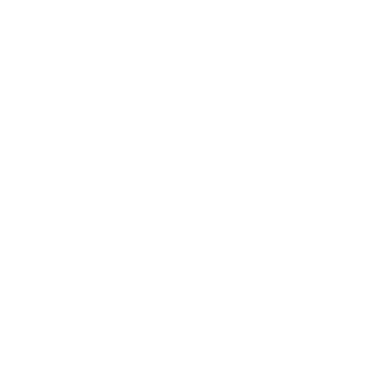

In [37]:
import matplotlib.pyplot as plt
from celluloid import Camera
from IPython.display import HTML
fig = plt.figure()
camera = Camera(fig)

for i in range(len(preds)):  # axial view
    plt.imshow(preds[i][0, 0, :, :], cmap="bone")
    plt.axis("off")
    camera.snap()

animation = camera.animate()
HTML(animation.to_html5_video())

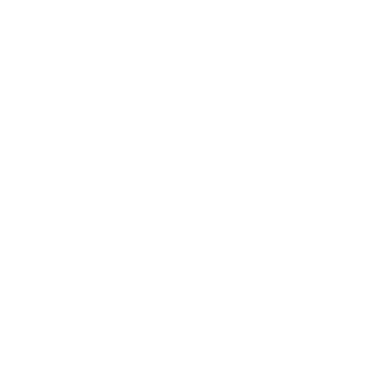

In [38]:
import matplotlib.pyplot as plt
from celluloid import Camera
from IPython.display import HTML
fig = plt.figure()
camera = Camera(fig)

for i in range(len(preds)):  # axial view
    plt.imshow(labels[i][0, 0, :, :], cmap="bone")
    plt.axis("off")
    camera.snap()

animation = camera.animate()
HTML(animation.to_html5_video())